# CAR PRICE PREDICTION WITH MACHINE LEARNING

#### Data Description

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\Internship\Oasis Infobyt\Task-3\Cars.txt')

In [3]:
#View data
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
#check the shape of data
data.shape

(205, 26)

In [5]:
#check the value counts of all the features
for column in data.columns:
    print(f'Column Name: {column}')
    print(data[column].value_counts())
    print("*"*75)


Column Name: car_ID
1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64
***************************************************************************
Column Name: symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
***************************************************************************
Column Name: CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
***************************************************************************
Column Name: fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
***************************************************************************
Col

In [6]:
#all the features of the dataset
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
#information from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
#checking whether there is any null value
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
#checking whether there is any duplicate value
data.duplicated().sum()

0

#### Inferences:
    1. Shape of the dataset is 206*26
    2. This dataset does not contains any null or duplicate values 

In [10]:
data_new = data

In [11]:
#denoting the target column
target = data['price']

In [12]:
# denoting the independent columns
data = data.drop('price',axis=1)

In [13]:
#view target column
target

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [14]:
#view data
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [15]:
#define objective and numerical features

objective_features = []
numerical_features = []

for column in data.columns:
    if data[column].dtype == 'O':
        objective_features.append(column)
    else:
        numerical_features.append(column)


In [16]:
#View objective features
objective_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [17]:
#View numerical features
numerical_features

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [18]:
#objective dataframe
data[objective_features]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [19]:
#numerical dataframe
data[numerical_features]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [20]:
#View unique values present in the columns of numerical features
data[numerical_features].nunique().sort_values()

symboling             6
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
curbweight          171
car_ID              205
dtype: int64

In [21]:
#View unique values present in the columns of objective features
data[objective_features].nunique().sort_values()

fueltype            2
aspiration          2
doornumber          2
enginelocation      2
drivewheel          3
carbody             5
enginetype          7
cylindernumber      7
fuelsystem          8
CarName           147
dtype: int64

#### Data Visualization

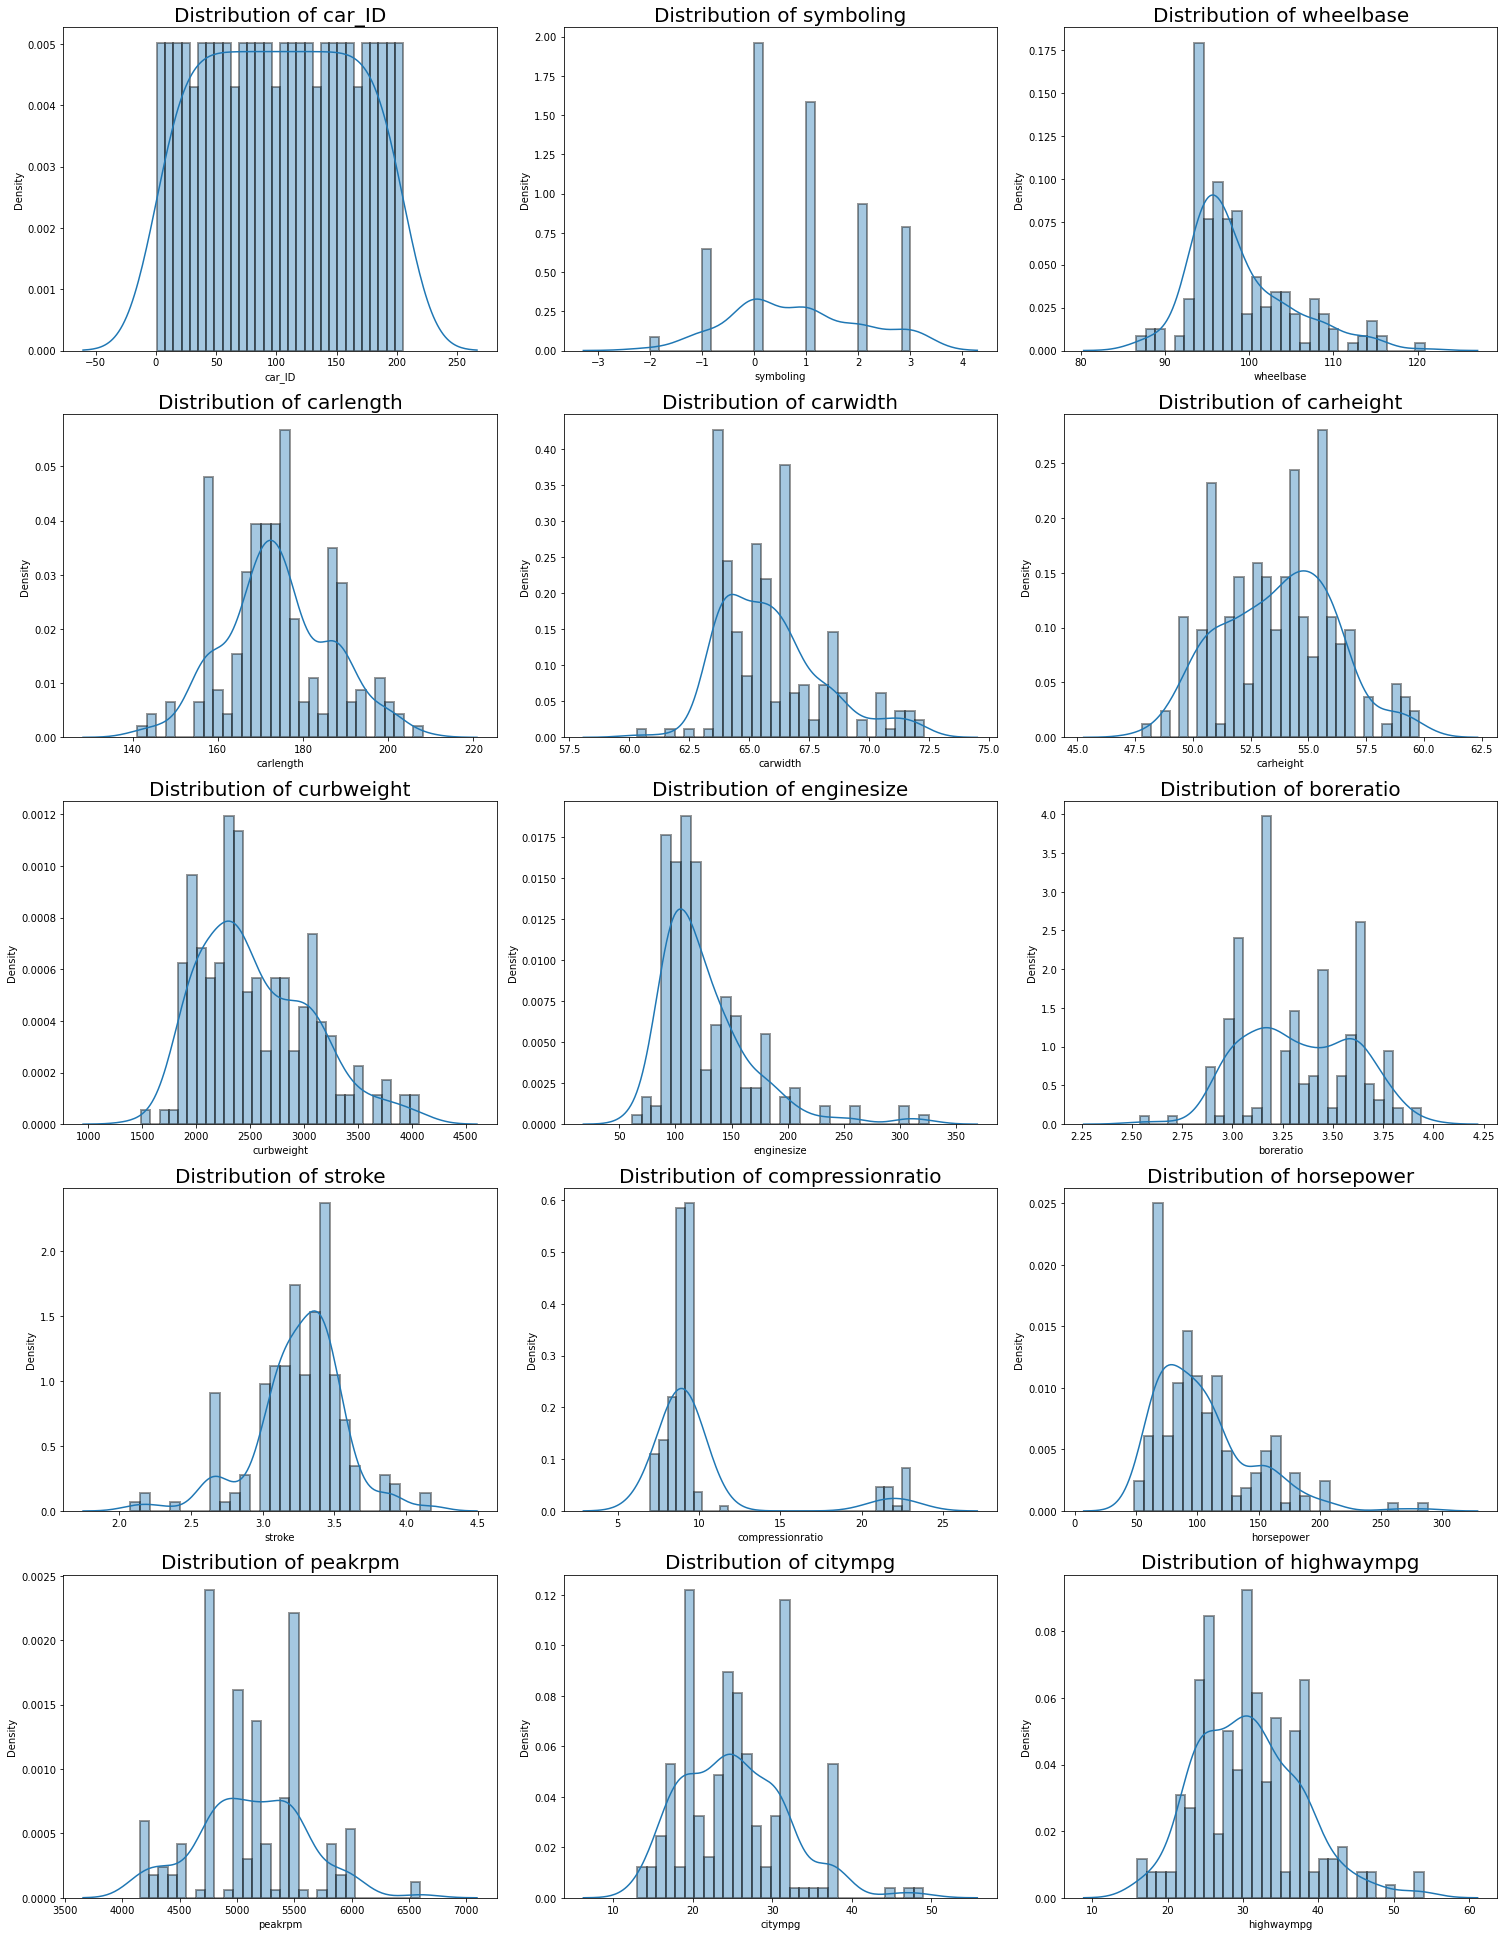

In [22]:
#distribution of numerical features

# Create a figure and subplots with a 2x6 grid
fig, axs = plt.subplots(5,3, figsize=(21,27))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i,column in enumerate(data[numerical_features].columns):
    plt.sca(axs[i])
    sns.distplot(data[column],hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
    plt.title(f'Distribution of {column}', fontsize= (20))
plt.tight_layout()
plt.show()

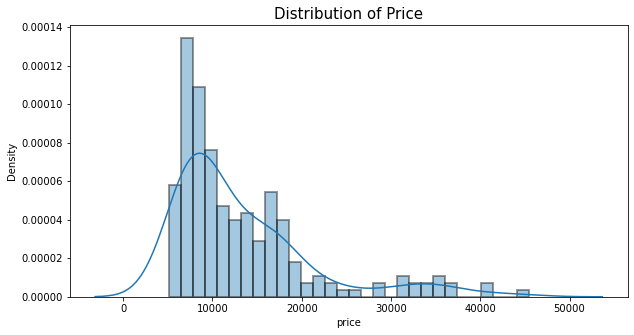

In [23]:
#distribution of target column 

plt.figure(figsize=(10,5))
sns.distplot(target, hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Distribution of Price', fontsize=(15))
plt.show()

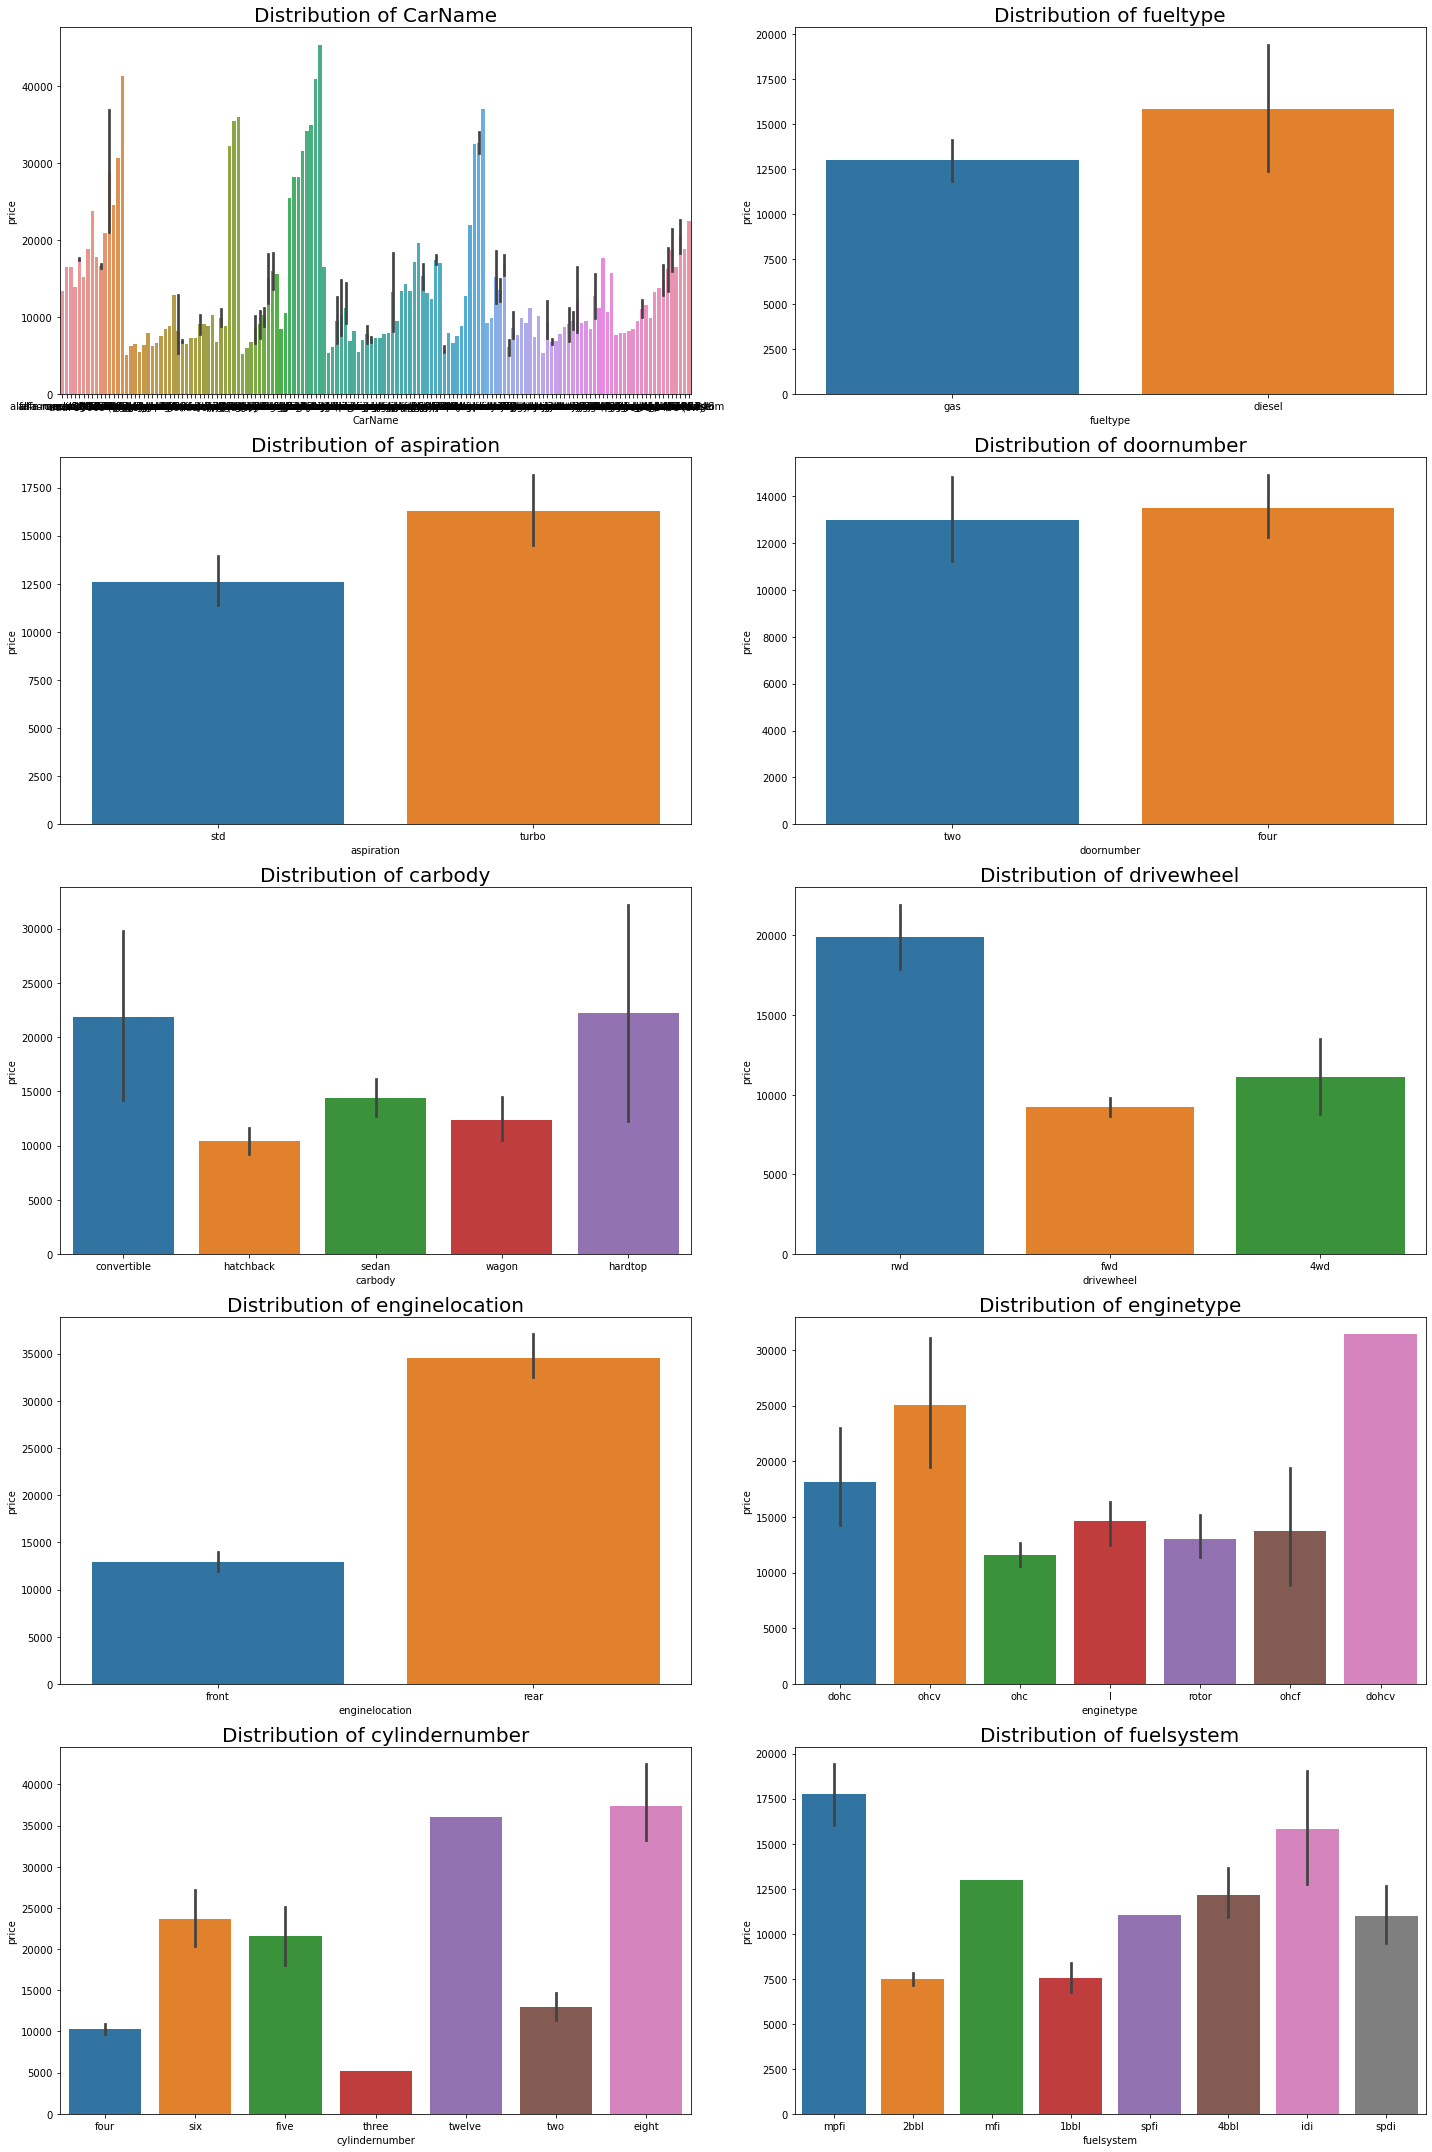

In [24]:
#relation between the variable and target variable

# Create a figure and subplots with a 2x6 grid
fig, axs = plt.subplots(5,2, figsize=(20, 30))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i,column in enumerate(data[objective_features].columns):
    plt.sca(axs[i])
    sns.barplot(x= data[column], y=target)
    plt.title(f'Distribution of {column}', fontsize= (20))
plt.tight_layout()
plt.show()

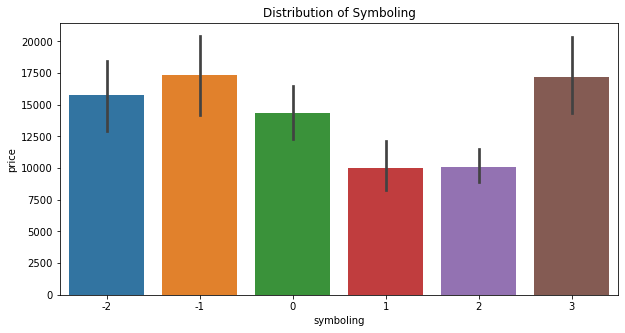

In [25]:
#relation between the variable and target variable

plt.figure(figsize=(10,5))
sns.barplot(x= data['symboling'], y=target)
plt.title('Distribution of Symboling', fontsize= (12))
plt.show()

#### Statistical measures

In [26]:
#Describe independent column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [27]:
#Describe dependent column
target.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [28]:
#Determine the correlation
data_new.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


#### Inferences:
    This dataset contains 26 columns.It is required to check the correlation amongst all the columns and drop the columns that are highly correlated to each other, as it may cause overfitting of the model.

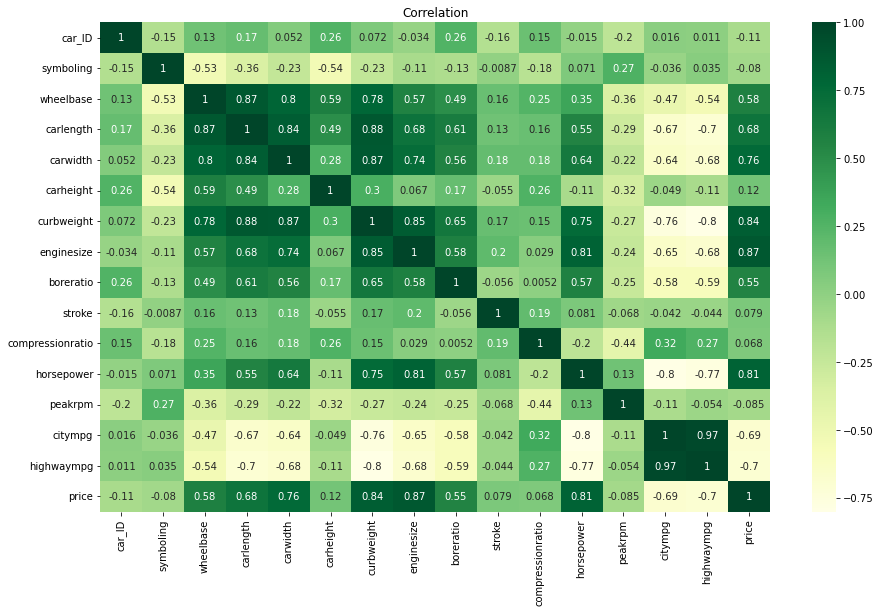

In [29]:
#plot correlation
plt.figure(figsize=(15,9))
sns.heatmap(data_new.corr(), cmap= 'YlGn', annot=True)
plt.title('Correlation')
plt.show()

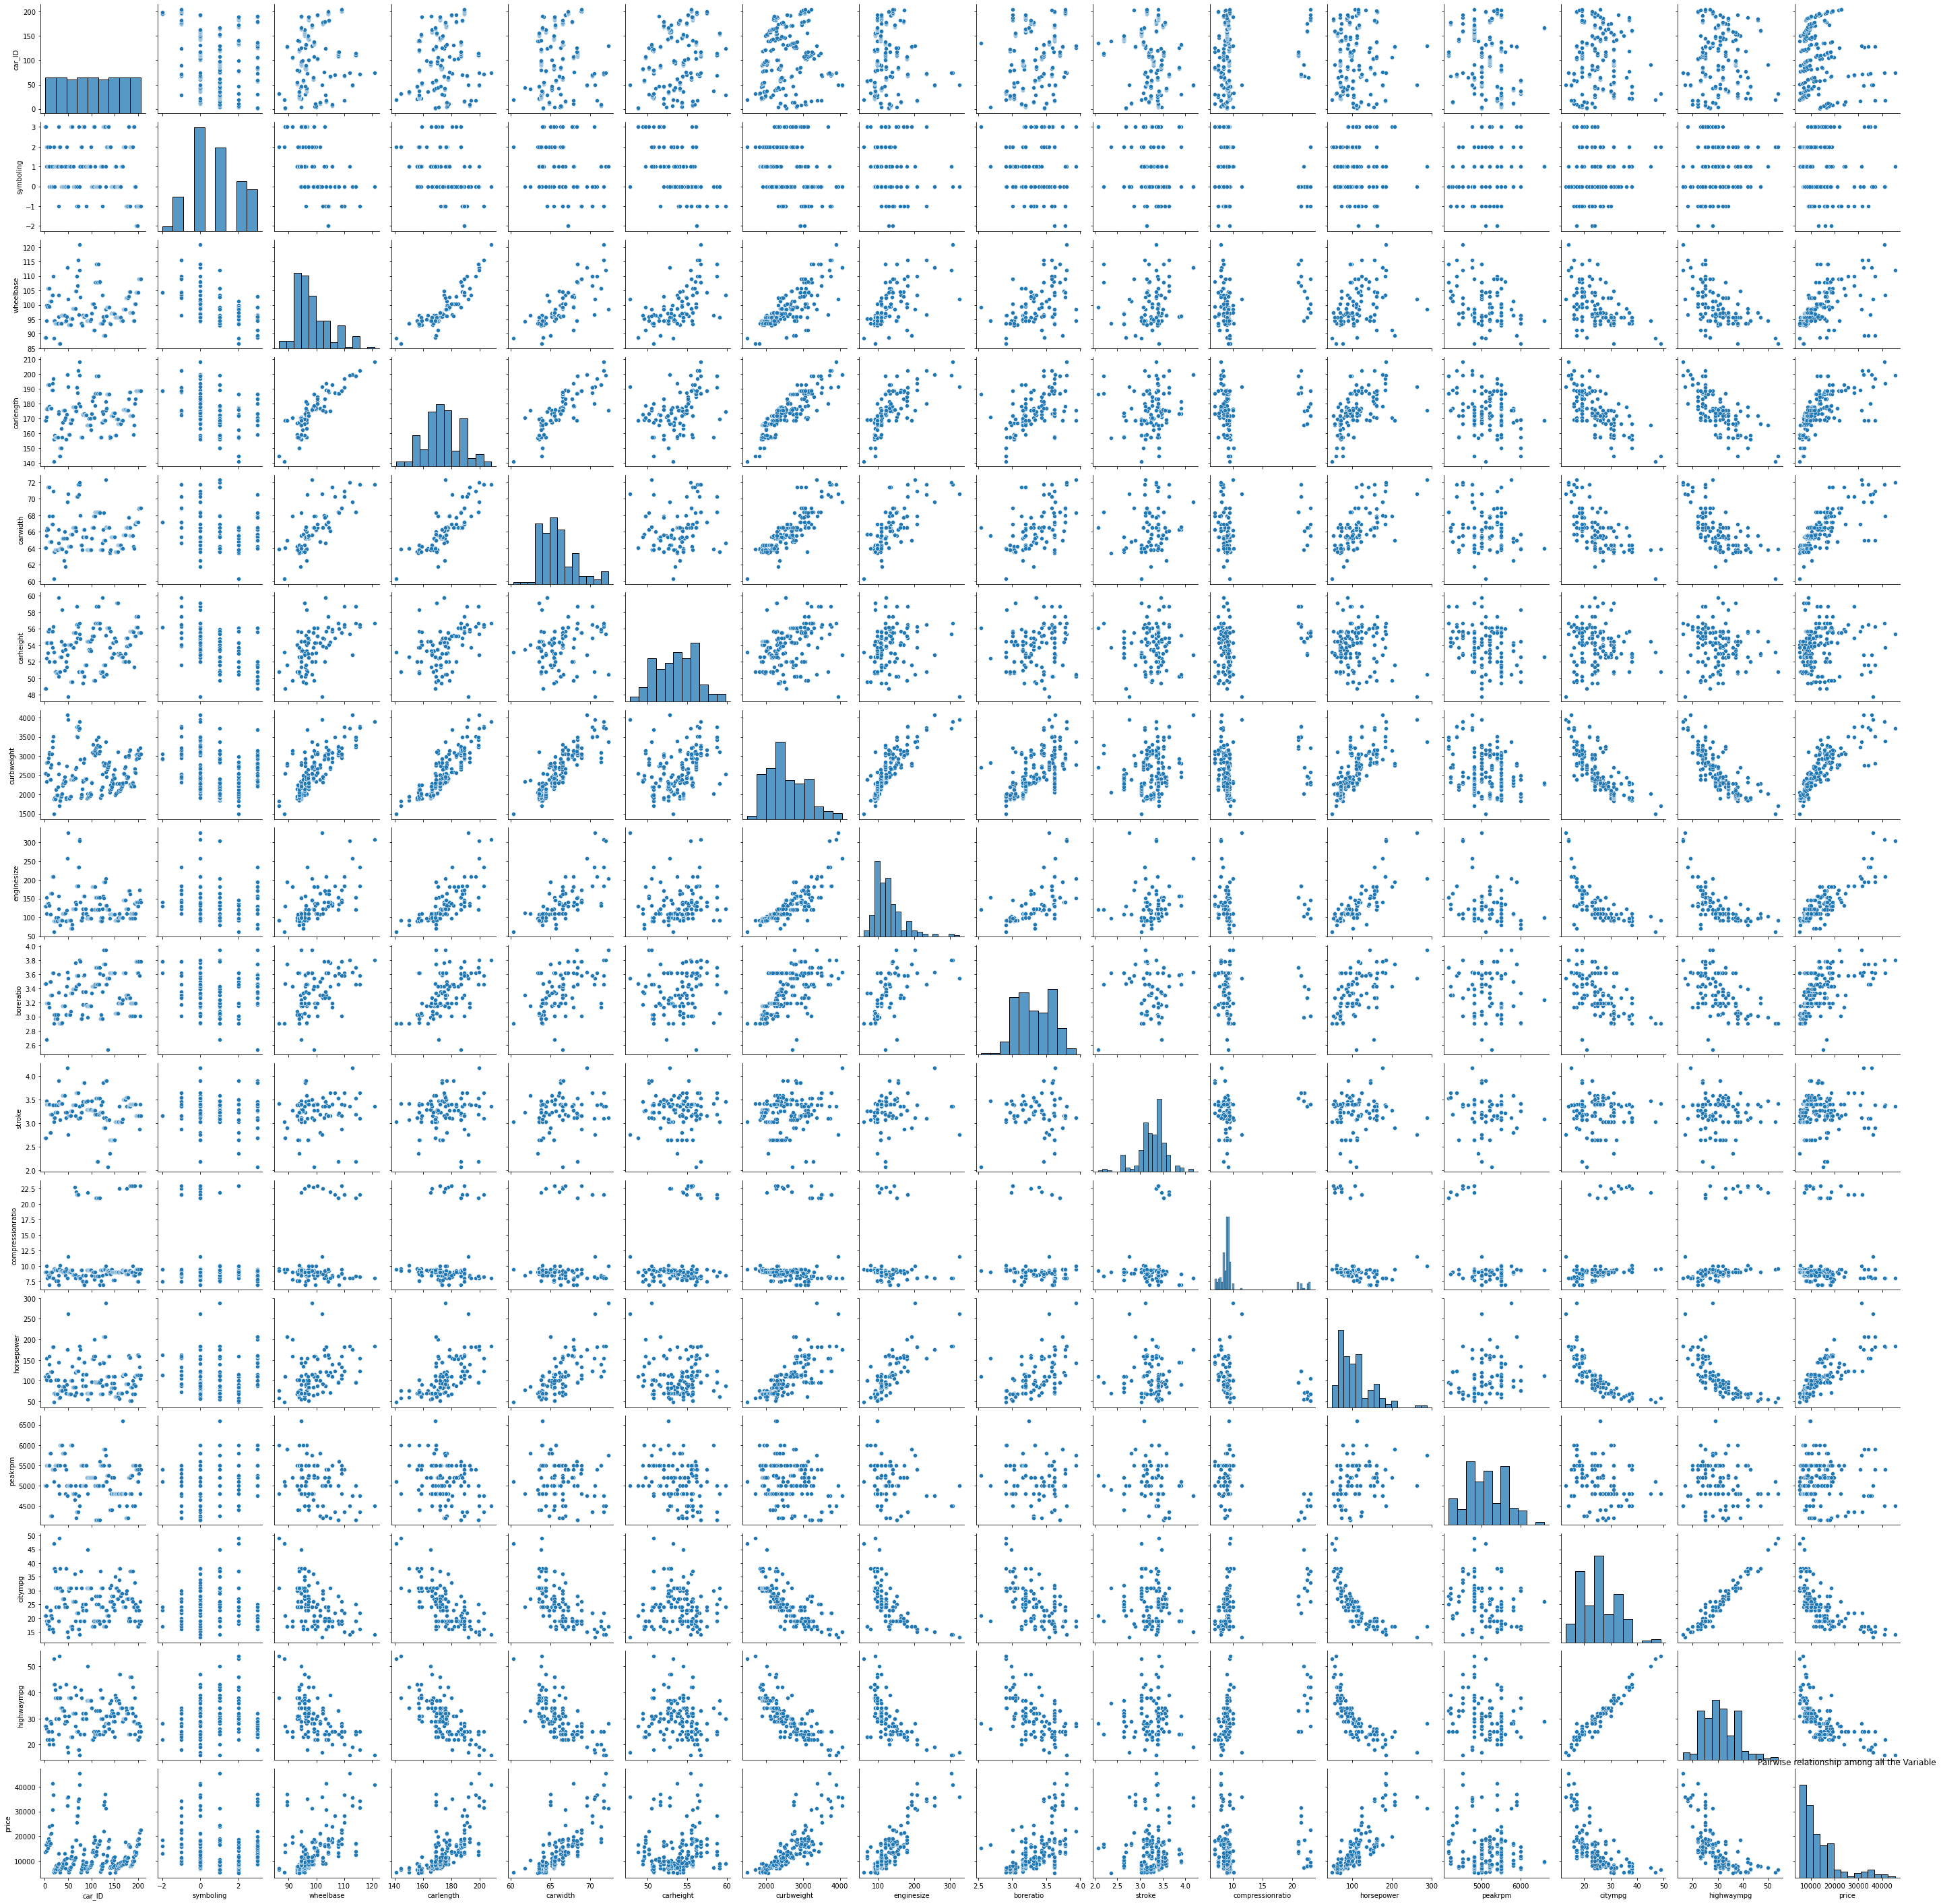

In [30]:
#Pairwise relationship amongst all the variables
sns.pairplot(data_new)#[['wheelbase','carlength','carwidth','curbweight','enginesize','price']])
plt.title("Pairwise relationship among all the Variable")
plt.show()

#### Data Wrangaling

In [31]:
#convert all the object variables to numerical type
objective_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [32]:
#Label dataset
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder = LabelEncoder()

In [34]:
objective_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [35]:
#convert all the object columns to numerical columns
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['doornumber'] = labelencoder.fit_transform(data['doornumber'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['enginetype'] = labelencoder.fit_transform(data['enginetype'])
data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])

In [36]:
#View the processed data
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,0,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,1,1,0,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,1,0,0,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,0,1,0,3,2,0,109.1,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


### Creating Validation Dataset

#### Train_Test Split

In [37]:
#break the data in validation dataset
from sklearn.model_selection import train_test_split

In [38]:
x = data.drop('CarName',axis=1)
x

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1,0,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,1,1,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,1,0,0,3,2,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,204,-1,0,1,0,3,2,0,109.1,188.8,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [39]:
y = target
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 24)
(41, 24)
(164,)
(41,)


In [42]:
#Import all the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,r2_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [43]:
#Define a programme to check the accuracy of the model
from sklearn import metrics
def model_evaluation(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    #accuracy = accuracy_score(true,predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    #print('Accuracy Score', accuracy)

In [44]:
#Linear Regression Model
lr = LinearRegression(normalize=True)

In [45]:
#Standard scaler to scale the dataset
scaler = StandardScaler()

In [46]:
lr_model = make_pipeline(scaler,lr)

In [47]:
lr_model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [48]:
y_predict = lr_model.predict(x_test)

In [49]:
r2_score(y_test,y_predict)

0.8344264918122551

In [50]:
#Linear regression model report
print('Test Evaluation of Linear Regression Model:\n')
model_evaluation(y_test, y_predict)

Test Evaluation of Linear Regression Model:

MAE: 2017.5332507043345
MSE: 6593517.115702935
RMSE: 2567.7844761005417
R2 Square 0.8344264918122551


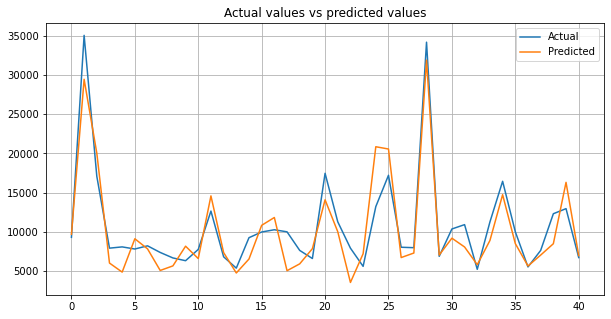

In [51]:
# plotting graph  for actual and predicted values
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(np.array(y_predict))
plt.title('Actual values vs predicted values')
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [52]:
#Random Forest regression model report
rf = RandomForestRegressor()

In [53]:
rf

RandomForestRegressor()

In [54]:
rf_model = make_pipeline(scaler,rf)

In [55]:
rf_model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [56]:
y_predict = rf_model.predict(x_test)

In [57]:
#Random Forest regression model report
print('Test Evaluation of Random Forest Regression Model:\n')
model_evaluation(y_test,y_predict)

Test Evaluation of Random Forest Regression Model:

MAE: 903.5397148780488
MSE: 1410390.4848045972
RMSE: 1187.5986210856752
R2 Square 0.9645828931076013


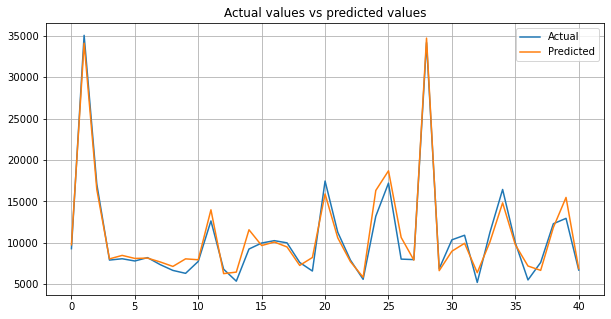

In [58]:
# plotting graph  for actual and predicted values
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(np.array(y_predict))
plt.title('Actual values vs predicted values')
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [59]:
#Decision Tree regression model
dctree = DecisionTreeRegressor()

In [60]:
dctree_model = make_pipeline(scaler,dctree)

In [61]:
dctree_model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [62]:
y_predict = dctree_model.predict(x_test)

In [63]:
#Decision Tree regression model report
print('Test Evaluation of Decision Tree Regression Model:\n')
model_evaluation(y_test,y_predict)

Test Evaluation of Decision Tree Regression Model:

MAE: 1539.0853658536585
MSE: 4133443.0060975607
RMSE: 2033.0870630884356
R2 Square 0.8962027932279495


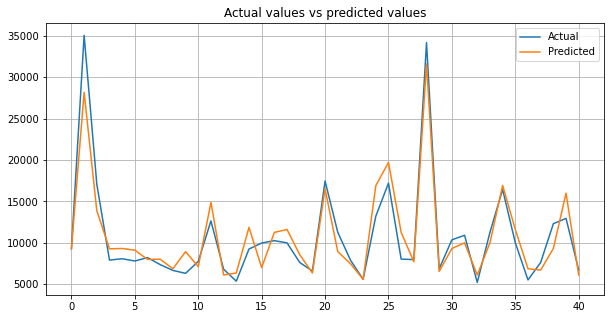

In [64]:
# plotting graph  for actual and predicted values
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(np.array(y_predict))
plt.title('Actual values vs predicted values')
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [65]:
#Gradient Boosting regression model
gbc_regressor = GradientBoostingRegressor()

In [66]:
gbc_regressor_model = make_pipeline(scaler,gbc_regressor)

In [67]:
gbc_regressor_model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [68]:
y_predict = gbc_regressor_model.predict(x_test)

In [69]:
#Gradient Boosting regression model report
print('Test Evaluation of Gradient Boosting Regression Model:\n')
model_evaluation(y_test,y_predict)

Test Evaluation of Gradient Boosting Regression Model:

MAE: 997.0641155794966
MSE: 1750224.8354641758
RMSE: 1322.960632620705
R2 Square 0.9560491220330702


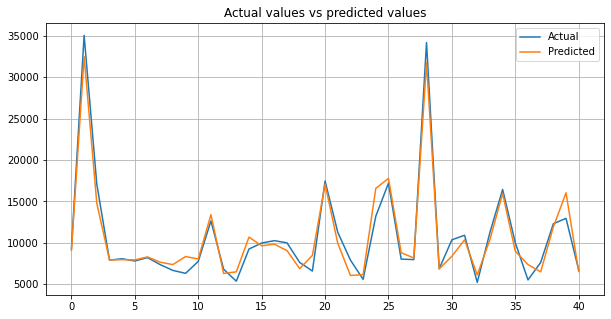

In [70]:
# plotting graph  for actual and predicted values
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(np.array(y_predict))
plt.title('Actual values vs predicted values')
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#### Inferences:
    1. The selected regression algorithms are -- Linear Regression, Decision Tree, Random Forest and Gradient Boosting
    2. Through the evaluation of the model's performance using metrics such as Mean Squared Error (MSE), Root Mean Squared    Error (RMSE), or R-squared (R^2) score, we have assessed the model's ability to predict car prices
    3. The Random Forest Regressor is best fit model amongst all the implemented regression models. 
       The R2 square = 0.9626663067497211

#### Predict Price for a new data

In [71]:
#Input new data
car_ID = float(input("Enter the car ID: "))
symboling = int(input("Enter the symboling: "))
fueltype = int(input("Enter the Fueltype: "))
aspiration = int(input("Enter the Aspiration: "))
doornumber = int(input("Enter the Doornumber: "))
carbody = int(input("Enter the Carbody: "))
drivewheel = int(input("Enter the Drivewheel: "))
enginelocation = int(input("Enter the Enginelocation: "))
wheelbase = float(input("Enter the Wheelbase: "))
carlength = float(input("Enter the Carlength: "))
carwidth = float(input("Enter the Carwidth: "))
carheight = float(input("Enter the Carheight: "))
curbweight = int(input("Enter the Curbweight: "))
enginetype = int(input("Enter the Enginetype: "))
cylindernumber = int(input("Enter the Cylindernumber: "))
enginesize = int(input("Enter the Enginesize: "))
fuelsystem = int(input("Enter the Fuelsystem: "))
boreratio = float(input("Enter the Boreratio: "))
stroke = float(input("Enter the Stroke: "))
compressionratio = float(input("Enter the Compressionratio: "))
horsepower = int(input("Enter the Horsepower: "))
peakrpm = int(input("Enter the Peakrpm: "))
citympg = int(input("Enter the Citympg: "))
highwaympg = int(input("Enter the Highwaympg: "))

Enter the car ID: 207
Enter the symboling: 3
Enter the Fueltype: 1
Enter the Aspiration: 0
Enter the Doornumber: 1
Enter the Carbody: 0
Enter the Drivewheel: 2
Enter the Enginelocation: 0
Enter the Wheelbase: 88.6
Enter the Carlength: 168.8
Enter the Carwidth: 64.1
Enter the Carheight: 48.8
Enter the Curbweight: 2548
Enter the Enginetype: 0
Enter the Cylindernumber: 2
Enter the Enginesize: 130
Enter the Fuelsystem: 5
Enter the Boreratio: 3.47
Enter the Stroke: 2.68
Enter the Compressionratio: 9
Enter the Horsepower: 111
Enter the Peakrpm: 5500
Enter the Citympg: 21
Enter the Highwaympg: 27


In [73]:
#train new data to predict the price
new_data = [car_ID, symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength,
            carwidth, carheight, curbweight, enginetype,cylindernumber,enginesize,fuelsystem, boreratio,stroke, 
            compressionratio, horsepower, peakrpm, citympg, highwaympg]

#make array of the data and reshape the data to get the result
new_data_arr = np.array(new_data)
new_data_arr = new_data_arr.reshape(1, -1)

#predict result using random forest model
result = rf_model.predict(new_data_arr)

#print the result
print(f"Price of the car: ₹ {result}")

Price of the car: ₹ [14430.54]
